# Graph Lab

## Header information:

  - Author #1: Hamna Malik (malikh32@mcmaster.ca)
  - Author #2: Julian Cecchini (cecchinj@mcmaster.ca)
  - Gitlab URL: http://gitlab.cas.mcmaster.ca/...
  - Avenue to Learn group name: Group 53

In [1]:
#Set up your virtual environment. 
# !pipenv install --dev

In [1]:
#make all files local
import sys
sys.path.append('..\\l1-graph-lab')

Week 1

i. load the graph from the CSV

In [2]:
from graph.graphBuilder.graphUpdater import TubeMapUpdater
from graph.undirectedGraph import TubeMap


generatedDict={'nodePath': '..\\l1-graph-lab\\_dataset\\london.stations.csv', 'edgePath': '..\\l1-graph-lab\\_dataset\\london.connections.csv', 'nodeID': 'id', 'edgeNodeLabel1': 'station1', 'edgeNodeLabel2': 'station2', 'weightLabel': ['time'], 'uniqueValues': ['line'], 'additionalPaths': {'line': '..\\l1-graph-lab\\_dataset\\london.lines.csv'}}
            
g=TubeMap({},{},{},{})
u=TubeMapUpdater(g, generatedDict)
u.update()



The following must be run locally on your computer. Running it in the jupyter notebook bugs it out when input is asked for. Example use of method can also be found below.

In [4]:
# def PathListGenerator():

#     dict={}
#     print("""------------------------------------------------------------------------------------------------------------""")
#     print("This function helps develop the dictionary necessary for graphUpdator, but is unnecessary to directly use it")
#     print("The format of the dictionary needed for graphUpdator that will be generated here is as follows:")
#     print("{nodePath: str, edgePath: str, nodeID: str, edgeNodeLabel1: str, edgeNodeLabel2: str}")
#     print("Optional Arguments: {weightLabels: list[str], uniqueValues: list[str], additionalPaths: dict[str : str] }")
#     print("Please check UndirectedGraph documentation to obtain further information. ")
#     print("\n")
#     print("Generation shall now begin...")

#     dict['nodePath']=input("Enter path to csv containing nodes for graph\n")
#     dict['edgePath']=input("Enter path to csv containing edges for graph\n")
#     dict['nodeID']=input("Enter label for row/column containing values that can uniquely identify nodes\n")
#     dict['edgeNodeLabel1']=input("Enter label for row/column containing values for one end of an edge\n")
#     dict['edgeNodeLabel2']=input("Enter label for row/column containing values for the other end of an edge\n")

#     print("Necessary values are done. Proceeding to optional arguments.")
#     print("If you wish to skip over an argument, enter \"s\" ")

#     inp=input("Enter label(s) for row/column containing values for edge weights, separated by commas but no spaces\n")
#     dict['weightLabel']=None if inp =="s" else inp.split(',')
#     inp=input("Enter label(s) for row/column containing values unique to edges, separated by commas but no spaces\n")
#     dict['uniqueValues']=[] if inp =="s" else inp.split(',')

#     dict['additionalPaths']={}
#     print("Enter title of csv and corresponding paths for additional features of the graph in the following format:")
#     inp=input("title/path, title/path, ...:\n")

#     if inp != 's':
#         for pair in [tuple.split('/') for tuple in inp.split(', ')]: 
#             print(pair) 
#             dict['additionalPaths'][pair[0]]=pair[1]
    
#     print("Dictionary has been generated, now returning")
#     print("""------------------------------------------------------------------------------------------------------------""")
#     return dict

# PathListGenerator()


Example use output that was done to form the dictionary for this lab

In [5]:
# ------------------------------------------------------------------------------------------------------------
# This function helps develop the dictionary necessary for graphUpdator, but is unnecessary to directly use it
# The format of the dictionary needed for graphUpdator that will be generated here is as follows:
# {nodePath: str, edgePath: str, nodeID: str, edgeNodeLabel1: str, edgeNodeLabel2: str}
# Optional Arguments: {weightLabels: list[str], uniqueValues: list[str], additionalPaths: dict[str : str] }
# Please check UndirectedGraph documentation to obtain further information. 


# Generation shall now begin...
# Enter path to csv containing nodes for graph
# ..\_dataset\london.stations.csv  #user input                                                       
# Enter path to csv containing edges for graph
# ..\_dataset\london.connections.csv #user input   
# Enter label for row/column containing values that can uniquely identify nodes
# id #user input   
# Enter label for row/column containing values for one end of an edge
# station1 #user input   
# Enter label for row/column containing values for the other end of an edge
# station2 #user input   
# Necessary values are done. Proceeding to optional arguments.
# If you wish to skip over an argument, enter "s" 
# Enter label(s) for row/column containing values for edge weights, separated by commas but no spaces
# time #user input   
# Enter label(s) for row/column containing values unique to edges, separated by commas but no spaces
# line #user input   
# Enter title of csv and corresponding paths for additional features of the graph in the following format:
# title/path, title/path, ...
# line/..\_dataset\london.lines.csv #user input   
# Dictionary has been generated, now returning
# ------------------------------------------------------------------------------------------------------------
# {'nodePath': '..\\_dataset\\london.stations.csv', 'edgePath': '..\\_dataset\\london.connections.csv', 'nodeID': 'id', 'edgeNodeLabel1': 'station1', 'edgeNodeLabel2': 'station2', 'weightLabel': ['time'], 'uniqueValues': ['line'], 'additionalPaths': {'line': '..\\_dataset\\london.lines.csv'}} 

ii. run metrics

In [4]:

from graph.metricExtractor.metricExtractor import MetricExtractor

mExtractor=MetricExtractor(g)

#number of nodes
print(mExtractor.get_num_nodes())

#number of edges
print(mExtractor.get_num_edges())

#avg degree of node
print(mExtractor.get_ave_degree())

#avg time between stations 
print(mExtractor.get_ave_weight(['time']))



302
406
2.6887417218543046
2.293103448275862


iii) Histogram of Nodes in Degree bins

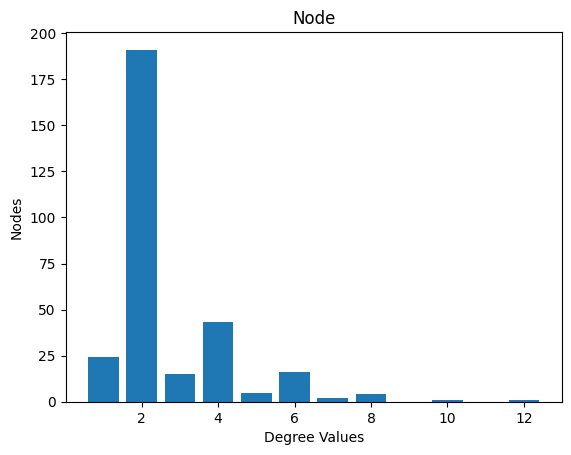

<Figure size 640x480 with 0 Axes>

In [5]:
#histogram for node bins
mExtractor.degreeHistogram()

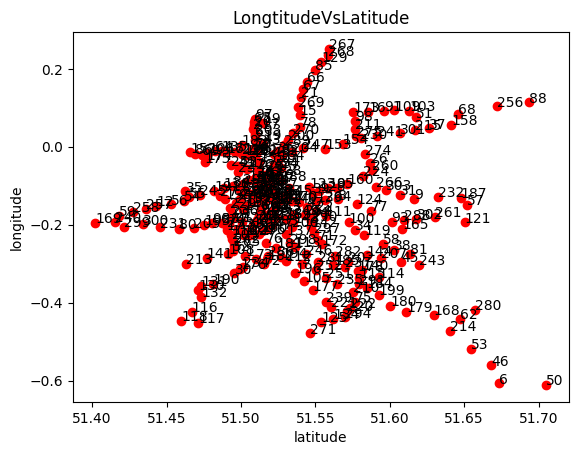

In [6]:
#map of tube for future reference
mExtractor.longitudeVslatitude()

KPIs to measure? 

Nodes and Edges checked for Dijkstra and Astar. Array accesses and dictionary accesses are involved but they are done on multiple levels and are much harder to keep track of (priority queue along with arrays and dictionaries internal to the graph, etc.), so they didn't seem as simple or indicative of the actual performance of the algorithm (say if the underlying apis somehow changed).

Itineraries to check?

Path with two nodes which don't exist, path with origin node which doesn't exist, path with end node that doesn't exist, path involving one node only and paths of varying lengths from 2-V. These all fall into cases which should produce different results, as seen in the pytest files for dijkstra and astar.

In [7]:
#necessary imports
from graph.kpi import KPI
import matplotlib.pyplot as plt
from graph.itinerary.shortestPath import *
from graph.itinerary.heuristic import *

In [8]:
#Dijksta test located in test_dijkstra.py

!pipenv run python -m pytest -coverage -v graph\test_dijkstra.py

============================= test session starts =============================
platform win32 -- Python 3.9.12, pytest-7.1.3, pluggy-1.0.0 -- C:\Users\Dingleberry\.virtualenvs\l1-graph-lab-Zg5V207Q\Scripts\python.EXE
cachedir: .pytest_cache
rootdir: c:\Users\Dingleberry\Documents\3XB3_personal\l1-graph-lab, configfile: overage
plugins: anyio-3.6.1
collecting ... collected 1 item

graph/test_dijkstra.py::test_all_cases PASSED                            [100%]

============================== 1 passed in 0.05s ==============================


In [9]:
#Astar Test

!pipenv run python -m pytest -coverage -v graph\test_astar.py

============================= test session starts =============================
platform win32 -- Python 3.9.12, pytest-7.1.3, pluggy-1.0.0 -- C:\Users\Dingleberry\.virtualenvs\l1-graph-lab-Zg5V207Q\Scripts\python.EXE
cachedir: .pytest_cache
rootdir: c:\Users\Dingleberry\Documents\3XB3_personal\l1-graph-lab, configfile: overage
plugins: anyio-3.6.1
collecting ... collected 1 item

graph/test_astar.py::test_all_cases PASSED                               [100%]

============================== 1 passed in 0.05s ==============================


In [10]:
#Additional tests to show use of different weight combos
#will be done with path 16 to 199

Dobj=Dijkstra(g)
Aobj=Astar(g)

Dobj.generatePath('15','57',[['time']])
print(Dobj.givePath())
print(Dobj.weightTotal())
Aobj.generatePath('15','57',[['time']], [BaseHeuristic]) #should be identical
print(Aobj.givePath())
print(Aobj.weightTotal())
Aobj.generatePath('15','57',[['time']], [EuclideanForTube]) #may be different
print(Aobj.givePath())
print(Aobj.weightTotal())
print('-----------------------------------------------------------------------------------------------')
Dobj.generatePath('15','57',[['time'], ['line']])
print(Dobj.givePath())
print(Dobj.weightTotal())
Aobj.generatePath('15','57',[['time'], ['line']], [BaseHeuristic, BaseHeuristic]) #should be identical
print(Aobj.givePath())
print(Aobj.weightTotal())
Aobj.generatePath('15','57',[['time'], ['line']], [EuclideanForTube, BaseHeuristic]) #may be different
print(Aobj.givePath())
print(Aobj.weightTotal())
print('-----------------------------------------------------------------------------------------------')
Dobj.generatePath('15','57',[['line'], ['time']])
print(Dobj.givePath())
print(Dobj.weightTotal())
Aobj.generatePath('15','57',[['line'], ['time']], [BaseHeuristic, EuclideanForTube]) #should be identical
print(Aobj.givePath())
print(Aobj.weightTotal())
Aobj.generatePath('15','57',[['line'], ['time']], [BaseHeuristic, EuclideanForTube]) #may be different
print(Aobj.givePath())
print(Aobj.weightTotal())
print('-----------------------------------------------------------------------------------------------')
Dobj.generatePath('15','57',[['station'], ['time']])
print(Dobj.givePath())
print(Dobj.weightTotal())
Aobj.generatePath('15','57',[['station'], ['time']], [BaseHeuristic, EuclideanForTube]) #should be identical
print(Aobj.givePath())
print(Aobj.weightTotal())
Aobj.generatePath('15','57',[['station'], ['time']], [BaseHeuristic, EuclideanForTube]) #may be different
print(Aobj.givePath())
print(Aobj.weightTotal())
print('-----------------------------------------------------------------------------------------------')


['57', '187', '232', '9', '31', '303', '266', '160', '95', '123', '145', '7', '188', '167', '156', '24', '164', '33', '36', '289', '200', '270', '78', '15']
[56]
['57', '187', '232', '9', '31', '303', '266', '160', '95', '123', '145', '7', '188', '167', '156', '24', '164', '33', '36', '289', '200', '270', '78', '15']
[56]
['57', '187', '232', '9', '31', '303', '266', '160', '95', '123', '145', '7', '188', '167', '156', '24', '164', '33', '36', '289', '200', '270', '78', '15']
[56]
-----------------------------------------------------------------------------------------------
['57', '187', '232', '9', '31', '303', '266', '160', '95', '123', '145', '7', '188', '167', '156', '24', '164', '33', '36', '289', '200', '270', '78', '15']
[56, 6]
['57', '187', '232', '9', '31', '303', '266', '160', '95', '123', '145', '7', '188', '167', '156', '24', '164', '33', '36', '289', '200', '270', '78', '15']
[56, 6]
['57', '187', '232', '9', '31', '303', '266', '160', '95', '123', '145', '7', '188', '16

Above, one can see the variability that arises in a given path by prioritizing different weights.

Benchmark for Dijkstra and Astar

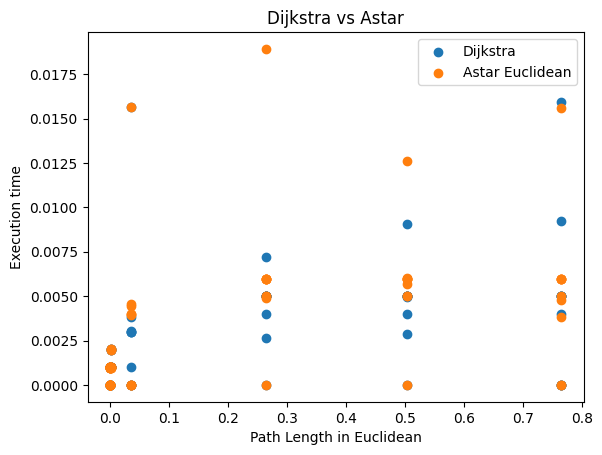

In [11]:
obj1=Dijkstra(g)
obj2=Astar(g)

x1=[]
y1=[]
y2=[]
y3=[]
y4=[]

kpi1=KPI(obj1)
kpi2=KPI(obj2)

cases=[['285','248',[['time']]],['285','273',[['time']]],['285','198',[['time']]], ['285','245',[['time']]], ['285','279',[['time']]], 
       ['169','77',[['time']]], ['169','50',[['time']]], ['16','50',[['time']]], ['267','50',[['time']]] ]  

#establish x's and y's
for case in cases:
    for i in range(10):
        dkpis=kpi1.calcIndicators(obj1.generatePath, case)
        akpis=kpi2.calcIndicators(obj2.generatePath, [*case, [EuclideanForTube]])
        xi = float(g.getNode(case[0]).getInfo('latitude'))
        yi = float(g.getNode(case[0]).getInfo('longitude'))

        xf = float(g.getNode(case[1]).getInfo('latitude'))
        yf = float(g.getNode(case[1]).getInfo('longitude'))
        x1.append(((xi-xf)**2 + (yi-yf)**2))
        y1.append(dkpis['executionTime'])
        y2.append(akpis['executionTime'])
        y3.append(dkpis['nodesChecked'])
        y4.append(akpis['nodesChecked'])

plt.scatter(x1, y1, label = "Dijkstra")
plt.scatter(x1, y2, label = "Astar Euclidean")
plt.xlabel('Path Length in Euclidean')
plt.ylabel('Execution time')
plt.title('Dijkstra vs Astar')
plt.legend()

plt.show()

It appears Astar takes longer on average for smaller inputs (makes sense with overhead of heuristic), but as paths grow in size Dijkstra catches up to it. At significantly longer paths, Astar may be seen to have a consistent better time.

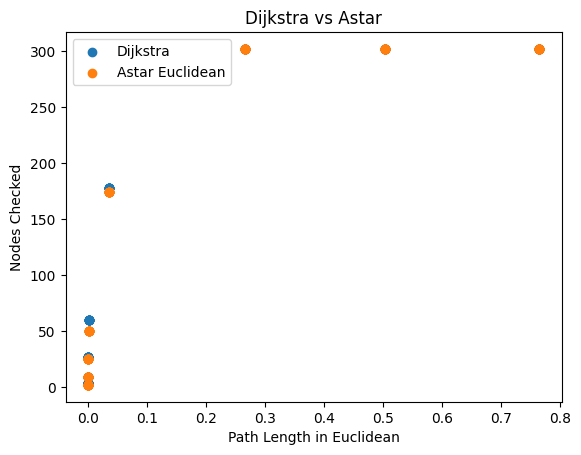

In [12]:
plt.scatter(x1, y3, label = "Dijkstra")
plt.scatter(x1, y4, label = "Astar Euclidean")
plt.xlabel('Path Length in Euclidean')
plt.ylabel('Nodes Checked')
plt.title('Dijkstra vs Astar')
plt.legend()
plt.show()

Note: astar tends to check less nodes on average, larger graphs are needed to see the direct effectiveness

Week 1:





Week 1 Justification:

The whole lab started with trying to turn the information within the csv files into workable data structures for a graph. It was important for us per the SOLID principles that information extraction be completely separate from graphing. This is why the cvsReader was created. It can open a cvs file and then create a python dictionary to store the information. These dictionaries can then be used, but the actual implementation is isolated from this process. This enforcess the single-responsibility principle, because the cvsReaders one and only responsibility is to extract the information from the cvs files. We felt that the cvsReader shouldn’t need to inherit a class at first because a different cvs file will need completely new methods and it will need to be rewritten either way, but then realized creating an inheritance structure would enforce the open and closed principle such that any new csvReader will be enforced to have certain behaviours (in this case have a read function).

We also have a PathListGenerator, which is a simple script where key features of graphs such as csv paths and core attributes (as will be discussed later on) are organized into a dictionary for future use. This dictionary can be received and analyzed by the GraphUpdater. It is simply a single dictionary within a single line. It is not always the best practice to hardcode in multiple values but in this case if somebody ever wanted to add onto a graph or simply change what csv file they are extracting graph info from, your options would be either to repeatedly change the hardcoded paths in a single class, make a new class and/or method for each file destination, or re-input it into a generic function that will change its access point. We elected for the fourth option, seeing a dynamic generation of the dictionary suits the dynamic nature of the task. We added the script to make it easer to do it, but the general structure of these dictionaries is also given so you can make it yourself without using the script if desired, as seen above in pathListGenerator. Once the appropriately formatted dictionary is made, it need simply be passed to the graphUpdater function and be forgotten about.

After dealing with where and how the graph object would extract information from a file, the base elements of the graph came into picture. Namely, the nodes and edges. We worried about being able to encapsulate Nodes and Edges in such a way such that adding special attributes to them (like having longitude for tube nodes or line for tube edges) wouldn't require redefining a node or edge class child along with methods that need to reference those attributes in external modules every single time. I.e., if I have mountain ranges and, now nodes have altitude and edges have incline, I don't want to have to make a mountainRangeNode, mountainRangeEdge and then ensure all connected external modules possess modified access functions like getAltitude and getIncline as that can become syntactically cumbersome. To do this, we came up with an idea of splitting core attributes of a node and edge from what we deemed 'extra info'. For nodes, its core attribute is id which allows nodes to be uniquely identified within a graph. For edges, its the two node ids it connects, for any edge must have a defined connection to exist in a graph. Thus, when building nodes or edges from a csv, all one must do is designate the columns of core attributes in our dictionary from above (for nodes in london.stations its 'id' and for edges in london.connections its 'node1' and 'node2'), and everything else will be stored in extraInfo (like zone, line, or station name, etc.). Whenever you desire to access a non-core attribute, you can simply do getInfo[nameOfAttribute] and you can change them along with core attributes as desired too. This ultimately saves you writing additional classes and methods to capture the additional attributes held by a node or edge. If ever necessary, you could inherit from Nodes or Edges to create a child for attributes that may not be well-defined in extraInfo alone.

Also, for a quick tidbit, a keen eye may notice the uniqueValues attribute for Edges. The uniqueValues attribute is necessary when two edges have identical node1 and node2 core attributes. Our underlying design for undirected graph ends up using adjacency lists but maintains those lists with dictionaries to instantly access edges if ever necessary, with edge IDs as keys. EdgeIDs are built from the concatenation of node1.id and node2.id by default. If those can ever be the same (which for the tube map they can), specifying uniqueValues (like['line']) will have edges be assigned their default ID concatenated with the values of extraInfo at uniqueValues given (i.e., edgeID=node1ID+node2ID+self.getInfo[uniqueValue]). This makes it so every edgeID is unique and there are never undesired collisions in the adjacency list dictionary which could over-write edges that link the same nodes.

To actually initialize the nodes and edges along with other components of a graph (like lines for the tube map) and place them together for our graph using the input from the CsvReaders, we have methods for collecting objects, aptly named collectors. This also enforces the single-responsibility principle, because it’s only job is to generate node and edges list (business logic) from the raw input passed from the CsvReader (input). These collectors are specific for given graphs (seeing they may have additional components like lines that require breaking down raw data in a special way), but there is a base one that can be inherited from to take care of nodes and edges alone for any graph. Therefore, one can always construct the key components necessary for a graph like nodes and edges using a base collector but if there are additional components, they can always inherit and add them on (as is seen in our code with the lineCollector). 

To summarize collectors, the graph class is responsible for the actual maintenance of the graph, but to keep it single-responsibility, we wanted colllectors to be responsible for breaking the information down from data obtained from csvReaders instead of graph objects. Collectors accomplish this with their 'collect' methods which produce objects from a received data structure based on core and non-core attributes passed to them (which is a dict received from CSVreader in this case). For example, BaseCollector has a nodeCollector method which will dissect a received dictionary for the core node attribute 'id', create a node object with this, and add other attributes of the received dictionary to the 'extraInfo' of that node object. This way, CsvReaders make a data structure of info from the csv, and collectors transform that data structure into graph component objects with their core and non-core attributes.

Once all the objects are created, they need to be placed into the actual graph. We’ve implemented a Factory Pattern between UndirectedGraph and another class called graphUpdater. The graphUpdater deals with permutations and changes to the graph, as well as its initialization. UndirectedGraph manages edges, nodes, and the adjacency list internally (for addition, deletion, or general access). The GraphUpdater initializes the csvReaders, and the Collectors, and then makes them work together to create a pipeline that is used to create the graph. Each time you want to update the graph, from the same csvfile, pass it into GraphUpdater and call update(). If you wish to add to a graph from different csvFiles, either call direct methods like updateNodes(new path here) with the specific csv you want to take from for that graph component, or re-initialize the graphUpdator object with a new dictionary of csvFiles from which the additional components will be taken from and simply pass your current graph to it as an argument. The decision to make methods like "updateNodes" public instead of private comes from a background of machine learning where graphs are often too big (millions of nodes) to do repeated mass modifications to and are much more convenient to do small-changes bit-by-bit (like adding say 1000 new Nodes or Edges without doing millions over again). The factory pattern comes in when we want to create a specific graph, like tubeGraph, that requires updating additional components or core components of a graph in a certain way, in which case we can inherit from the UndirectedGraph class to make a template for the components of the graph, and inherit from the GraphUpdator class to manage that template in a certain way. This dynamic can be seen with the TubeMap (graph class) and TubeMapUpdater (GraphUpdater). This way you can add as many types of graphs, depending on the situation, and the graph implementation will still function.

Separate from all the graph implementations, we also have a metric extractor call. This allows us to call all the functions within it onto specific graphs to extract specific pieces of information like the average degree and the number of nodes.

For the design of the shortest path algorithms, we simply made a strategy pattern to comply with SOLID principles. There is a base class of ShortestPath which has integral methods and attributes any shortest path class shoud have like generatePath or weightTotal and any child must inherit and maintain these methods to guarantee any version of of this class will be able to produce a defined shortest path and the weights associated with it.

For the shortest path algorithm, we ran into a dilemma of not being able to combine weights while also relaxing edges, like prioritizing time and stations passed simultaneously, or prioritizing lines first and foremost with time as a secondary. Therefore, the algorithm is run with different weight prioritizations for the client to select. This design choice was necessary because it is impossible to predict how much of one weight (say time for the tube) any given client is willing to sacrifice for another (like fewer line transfers). By allowing lexicographical comparisons of weight lists, clients are given an assortment of options of which weights they wish to prioritize and in what order to land at a decision of what works best for them (i.e., [['line'],['time']] vs [['time']] vs [['time', 'station']], vs [['time'], ['station']], etc.). Also, for Astar's heuristics, we came up with station count (which uses a bfs originating from the destination node to find station distances going towards the origin node) and Euclidean distance between nodes. These heuristics are not necessarily admissable (as direct distance and station count between stations does not translate to time taken directly), but they allow clients to have a bias for their path without absolute prioritization of a weight, and euclideanDistance also steers the Astar algorithm towards the answer faster as input size increases as seen with dijkstra gaining on Astar in increasing path sizes above). We simply present the best solutions to the customer according to different preferences, and they can decide their journey.

For benchmarking, we have a KPI class with methods within it that can be called within each algorithm. It is very generic and does not need to be inherited for specific classes. The way it works is applicable classes (like shortestPath algorithms) keep track of KPIS internally (like nodes and edges) and possess a giveKPI function which will pass off their internal dictionary of KPIs to this class for it to store and add on a metric of execution time. In a sense, it's like a decorator pattern as an object is passed into it and gains modification to one of its existing internal attributes.

In terms of how the work was done, it usually included the two of us discussing different design options and ideas. We both would break down the problem, brainstorm ideas, and discuss how to execute it. After these decisions were made collaboratively, Julian took charge of implementing them with support from Hamna. For example, Julian wrote the shortest path algorithm, and Hamna wrote the priority queue for him to implement this. Julian was responsible for most of the algorithm coding, and once complete Hamna took charge of the UML diagram and writing the justifications of design that they discussed. Improvements and alterations throughout the project were discussed and developed together as well.


#Week 1 UML

![UML_Diagram](C:\Users\Dingleberry\Documents\3XB3_personal\l1-graph-lab\uml_week1.png)

Week 2

TSP Test

In [13]:
#necessary imports
from graph.itinerary.tsp import BruteForceTSP
import math

In [14]:
#TSP Test

!pipenv run python -m pytest -coverage -v graph\test_tsp.py

============================= test session starts =============================
platform win32 -- Python 3.9.12, pytest-7.1.3, pluggy-1.0.0 -- C:\Users\Dingleberry\.virtualenvs\l1-graph-lab-Zg5V207Q\Scripts\python.EXE
cachedir: .pytest_cache
rootdir: c:\Users\Dingleberry\Documents\3XB3_personal\l1-graph-lab, configfile: overage
plugins: anyio-3.6.1
collecting ... collected 1 item

graph/test_tsp.py::test_all_cases PASSED                                 [100%]

============================== 1 passed in 0.05s ==============================


TSP Benchmark

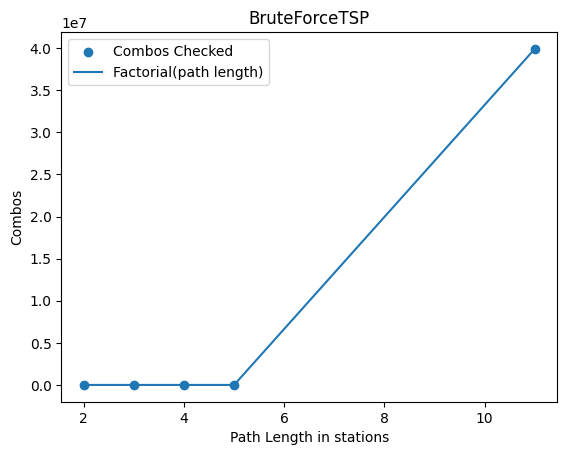

In [15]:
obj3=BruteForceTSP(g)

x1=[2,3,4,5,11]
y1=[]
y2=[]

kpi3=KPI(obj3)

cases=[ [['285','248'],['time']], [['285','248','273'],['time']], [['285','248','273','198'],['time']], [['285','248','273','198', '272'],['time']], [['285','248','273','198', '272', '245', '191','136','84','148','279'],['time']] ]

for case in cases:
    kpis=kpi3.calcIndicators(obj3.generatePath, case)
    y1.append(kpis['combosChecked'])
    y2.append(kpis['executionTime'])

plt.scatter(x1, y1, label = "Combos Checked")
plt.plot(x1, [math.factorial(x) for x in x1], label="Factorial(path length)")
plt.xlabel('Path Length in stations')
plt.ylabel('Combos')
plt.title('BruteForceTSP')
plt.legend()

plt.show()


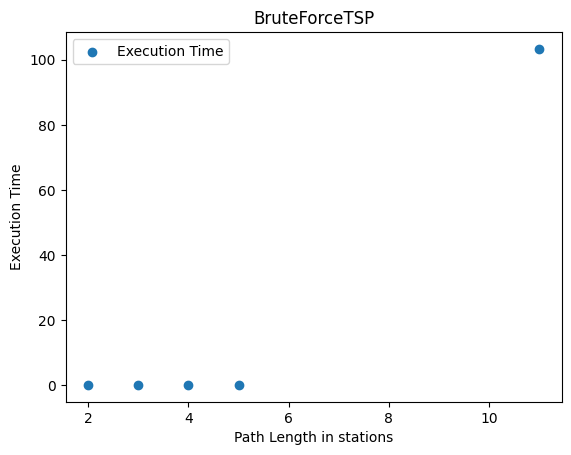

None


In [16]:
plt.scatter(x1, y2, label = "Execution Time")
plt.xlabel('Path Length in stations')
plt.ylabel('Execution Time')
plt.title('BruteForceTSP')
plt.legend()

plt.show()

print(obj3.givePath())

As expected, combos checked along with execution time start to blow up with larger n.

Component Collector Test

In [17]:
#necessary imports
from graph.itinerary.componentConnector import DiComponentConnector
obj=DiComponentConnector(g, 'zone')

In [18]:
#Component Collector Test

!pipenv run python -m pytest -coverage -v graph\test_cc.py

============================= test session starts =============================
platform win32 -- Python 3.9.12, pytest-7.1.3, pluggy-1.0.0 -- C:\Users\Dingleberry\.virtualenvs\l1-graph-lab-Zg5V207Q\Scripts\python.EXE
cachedir: .pytest_cache
rootdir: c:\Users\Dingleberry\Documents\3XB3_personal\l1-graph-lab, configfile: overage
plugins: anyio-3.6.1
collecting ... collected 1 item

graph/test_cc.py::test_all_cases PASSED                                  [100%]

============================== 1 passed in 0.05s ==============================


{'175': ['175', '253', '41', '174', '216', '23', '42', '276', '120', '292', '225', '238', '201', '284', '155', '295', '61', '4', '27', '244', '228', '171', '70', '164', '135', '32', '24', '33'], '177': ['177', '239', '221']}
[['177', '105', '196', '112', '181', '76', '296', '226', '127', '186', '208', '149', '162', '28', '192', '259', '126', '48', '250', '13', 'island1']]
---------------------------------------


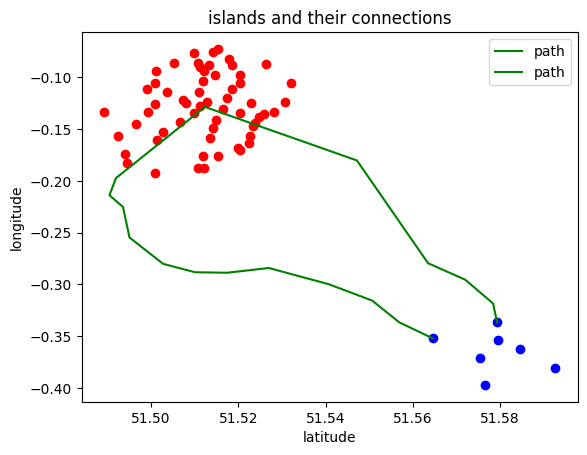

{'285': ['285', '87', '248', '107', '279', '49', '255', '273', '28', '133', '197', '192', '148', '233', '13', '151', '25', '229', '198', '162', '11', '146', '212', '259', '277', '157', '156', '250', '167', '60', '161', '236', '149', '163', '83', '104', '126', '102', '89', '29', '2', '3', '48', '14', '188', '44', '99', '208', '82', '193', '90', '223', '145', '263', '92', '7', '166', '122', '18'], '199': ['199', '184', '115', '291', '210', '75', '235']}
[['115', '178', '202', '282', '94', 'island1'], ['235', '251', '252', '5', '194', '182', '73', '1', '265', '110', '17', '74', 'island1']]


In [19]:
#additional demonstration
from cProfile import label
import matplotlib.pyplot as plt
import math

obj=DiComponentConnector(g, 'zone')
obj.generatePath('175','177',[['time']])
print(obj.giveIslands())
print(obj.givePath())
print('---------------------------------------')
obj.generatePath('285','199',[['time'], ['line']])
islands=obj.giveIslands()
paths=obj.givePath()

latitude = []
longitude = []

for n in islands['285']:
    latitude.append(float(g.getNode(n).getInfo('latitude')))
    longitude.append(float(g.getNode(n).getInfo('longitude')))

plt.scatter(latitude, longitude, c='red')

cX=sum(latitude)/len(latitude)
cY=sum(longitude)/len(longitude)

latitude = []
longitude = []

for n in islands['199']:
    latitude.append(float(g.getNode(n).getInfo('latitude')))
    longitude.append(float(g.getNode(n).getInfo('longitude')))

plt.scatter(latitude, longitude, c='blue')

for path in paths:
    latitude=[]
    longitude=[]
    for i in range(len(path)-1):
        latitude.append(float(g.getNode(path[i]).getInfo('latitude')))
        longitude.append(float(g.getNode(path[i]).getInfo('longitude')))
    latitude.append(cX)
    longitude.append(cY)
    plt.plot(latitude, longitude, c='green', label='path')
        

plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('islands and their connections')
plt.legend()
plt.show()

print(islands)
print(paths)

Component Collector Benchmark

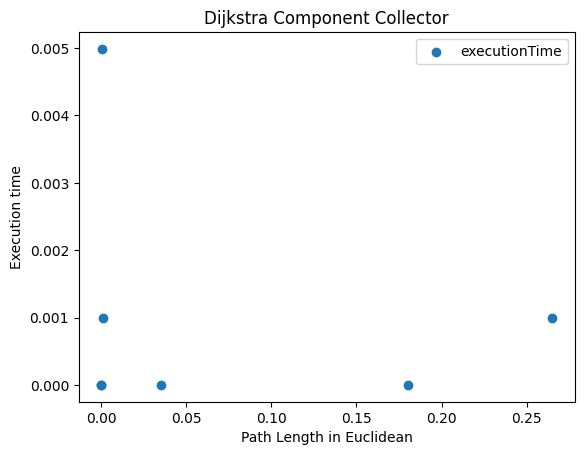

In [20]:
obj4=DiComponentConnector(g, 'zone')

x1=[]
y1=[]
y2=[]

kpi4=KPI(obj4)

cases=[['285','248',[['time'], ['line']]],['285','198',[['time'], ['line']]], ['285','245',[['time'], ['line']]], ['285','279',[['time'], ['line']]], ['169','77',[['time'], ['line']]], ['169','50',[['time'], ['line']]], ['169','88',[['time'], ['line']]] ]  

#establish x's and y's
for case in cases:
    kpis=kpi4.calcIndicators(obj4.generatePath, case)
    xi = float(g.getNode(case[0]).getInfo('latitude'))
    yi = float(g.getNode(case[0]).getInfo('longitude'))

    xf = float(g.getNode(case[1]).getInfo('latitude'))
    yf = float(g.getNode(case[1]).getInfo('longitude'))
    x1.append(((xi-xf)**2 + (yi-yf)**2))
    y1.append(kpis['executionTime'])
    y2.append(kpis['nodesChecked']*math.log2(kpis['edgesChecked']+0.00000001)+kpis['nodesChecked']+kpis['edgesChecked'])


plt.scatter(x1, y1, label = "executionTime")
plt.xlabel('Path Length in Euclidean')
plt.ylabel('Execution time')
plt.title('Dijkstra Component Collector')
plt.legend()

plt.show()

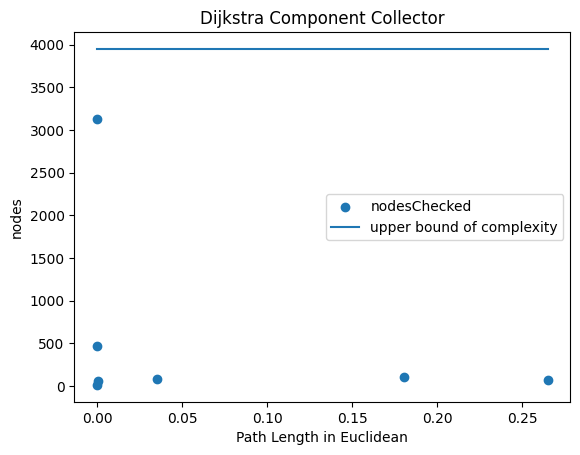

In [21]:
plt.scatter(x1, y2, label = "nodesChecked")
O=len(g.allEdges())*math.log2(len(g.allNodes()))+2*(len(g.allEdges())+len(g.allNodes()))
plt.plot([0, max(x1)], [O, O], label = "upper bound of complexity")
plt.xlabel('Path Length in Euclidean')
plt.ylabel('nodes')
plt.title('Dijkstra Component Collector')
plt.legend()

Week 2 Justification:
 
Two new algorithms were added to the design. First was TSP algorithm, which provides the shortest path within a subset of nodes, while also ensuring every node is visited. For this we implemented a brute force algorithm as a child of an superclass for TSP solvers, to allow for different implementations if desired. The brute force way works by finding all solutions and then provide only the shortest of these. This means that the shortest path can always be guaranteed. The other algorithm added was the connected components. This was done by first using BFS to find the connected components, and then Dijkstra to find the shortest path between these components. The way it works is, when given 2 nodes in different components with edges linking them, the set of shortest paths linking their components are found. However, if they are within the same component or there are no edges connecting them, no path is returned. It can be essentially be thought of as a shortest path algorithm done between two super nodes (internally containing all nodes of a componen). It is notable that the design of both of these algorithms was done with a strategy pattern such that, if desired, different versions/implementations can be created and interchangeably used.
 
We made multiple changes to our design to better uphold the SOLID principles, namely the open-and-closed principle. Namely, this includes our design for the shortestPath algorithm and classes that deal with giving paths and kpis. Starting off, instead of a large shortestPath class with Dijsktra and A*, we split this up and made them two children of the shortestPath class. This allows different implementations of the shortest path algorithm to be easily identified by their class instead of being one of many methods within one giant class (which is nice for readability). Next, for classes that deal with giving paths like shortestPath or TSP or componentConnector, an itineraryObject class was made. This was done to softly enforce certain method definitions for any classes that deal with itineraries/paths, such as generatePath() and givePath(), but more importantly was done to create a homogenous api such that any external module or class that wishes to receive a itinerary/path can be guaranteed to do it in the same way regardless of the context. If an external module pr class expects to deal with itineraries of different forms, they can now use itineraryObject children the same way regardless of which type is instantiated. This is evident above by how I call the same methods for testing from ShortestPath, TSP, and compnentConnector. Finally, with a similar mindset to itineraryObject's creation, we created a KPIparticipant class which must be inherited by any class whose objects are desired to be tracked and analyzed for kpis. The reasoning for this is it soft-enforces children to define a giveKPI method which is used by the main KPI class, creating a sort of contract that ensures any object the KPI class receives will cooperate with providing a dictionary of its internally tracked kpis which it can add onto and modify. Previously, this was not the case, and it was assumed a giveKPI method would be defined.

THEORETICAL ANALYSIS

The TSP uses bruteforce to calculate all permutations of n, which means n! possibilities are checked per combinatorics. This gives it an overall complexity of O(n!). ComponentConnector used BFS (which is V + E), along with additional node searches along the adjacency list to help compress nodes involved with bringing together islands. It then runs a single dijkstra SP search between the compressed components and the rest of the graph to establish shortest paths between them, which results in a E logV (created by the priority queue which is re-inserted into every time an edge is relaxed). This leads to an overall complexity of ElogV + C(V + E) or O(ElogV).

EMPERICAL ANLYSIS:

Seen above

BruteForceTsp exploded in combinations checked and also in time as n increased. The jump between n=5 and n=11 is massive, but as seen on the plot, follows the exact theoretical expectatino of n!. This means the implementation is performing as expected. The approach could definitely use improvement via the dynamic implementation for 2^n*n^2. 

Connected components checks a significant amount of nodes and edges, more than aStar and Dijkstra anyway. This is to be expected as it establishes multiple connections between groups of nodes using BFS before running a dijkstra search which does not stop early. However, as observed in the graph above, it comes close to but never quite exceeds above a complexity of E logV + V + E in all cases tested. This helps reassure that its implementation was done correctly and the theoretical analysis of it was accurate. However, such observations are no where close to ideal induction and more cases would be desirable to test.

SOLID:

As described in week 1 justification, a lot of our design enforces the single responsibility principle. Our design was made so that every class is only responsible for one thing, whether it be making the graph, maintaining the graph, getting information from the cvs files, or extracting it from the graph.
 
We also enforce the open-close principle with many classes as discussed. One such example would be the undirectedGraph and graphUpdater, as the way the graph is created is closed for modification. However, if you wanted to extend it to make it a more specific graph, you can simply add a child to these classes to extend the code.
 
Liskov substitution principle is satisfied withe undirectedGraph factory pattern we have. If we made a child tubeGraph class of the undirectedGraph class, and instantiated the tubeGraph instead of an undirectedGraph, the entire design would still function the same.
 
The Interface Segregation Principle is enforced with the new design change we made of the itinerary. There are times when only one algorithm needs to be used, whether dijkstra, A* or TSP. These are all not necessary to the user at all times. Therefore, by creating separate classes of these, we can ensure the program is only accessing parts of the code that it actually needs to satisfy the user.


SELF-REFLECTIONS:

Hamna Malik (malikh32)

Backward: 

This is lab was very unique to me as it actually allowed to apply what I have been learning in my classes for far. I have spent a lot of time just learning theories and concepts about graphs, nodes and edges, but this assignment allowed us to implement my learning into real world problems and applications. I was able to create my own algorithm to graph various scenarios, which I have previously never done. 


Inward:

I would say that this assignment was on the challenging side for me, as this type of work is new to me and the instructions were difficult to follow. I struggled to understand the steps I needed to logically take. However, after some time passed, I was more familiarized with what was being asked of me. Personally, this lab was not enjoyable because it was a big leap from what I was used to, and felt very lost for the majority of the assignment. However, one aspect that I did like was making the UML diagrams because as I broke down all the classes and relationships, it was at that point that I truly started to understand the scope of the algorithm, and it’s implementation.


Outward:

I want people notice the consideration we made into making it very user friendly and also its flexibility to be applied to any graph and CVS file. It took a while and some struggle to figure out how to get ourideas into action to create a final product that I am actually proud of. The aspect of making the algorithm as universal as it can be was very meaningful to me, so I would hope that others also acknowledge the amount of thought put into the code to make this possible. 


Forward:

If I could redo this assignment, I would definitely choose to change communication methods between those in my group. I had some communication barriers with my first group member (who is no longer a part of the group). There were many misunderstandings, a lot of “blameshifting”, and a lack of communication regarding ones concerns. Next time, using clear communication and attempting to tackle these concerns on our own before before bringing in the instructors is definitely something to keep in mind. Another thing I would do differently would be to reach out for help and assistance when needed, instead of trying new things and guessing over and over for hours as this is not an efficient and effective use of time. I would also change the way I managed my time, as the pace that I chose resulted in some last minute cramming which definitely induced some stress. 




Julian (cecchinj):

Backward: I have done graph traversal algorithms for 2C03 in second year as well as navigation of graphs for machine learning models to understand propagation between layers.

Inward: I loved the goal of the project. I think it made me a better software engineer towards the end in multiple ways. Some examples would be communication between teammates to ensure code is understood and how to write code fast by shooting out ideas without too much hesitation. My only issue was trying to manage the work I believed was required for this project among other burdens, both academic and personal. I liked the necessity to utilize my algorithmic knowledge from the past to really get a feel for the application. I disliked having to navigate through the path issues brought forward by virtual environments, or specifically pipenv since previous virtual environments I have worked with have not brought me such issues.

Outward: I want people to notice my work is imbued with passion and thought. Even thought some work may be worse-off due to time crunches, I really do care about projects like this and thrive getting to explore different approaches to problems.

Forward: I would get a partner off the bat, not doing so made for a rough start. I’d also scale back some of the scalability I allowed for on initial parts to save myself time for later sections. Lastly, I would spend less time worrying about the pipenv path issues and just wait for TAs to resolve that to save myself a whopping 2-days.










#Week 2 UML

![UML_Diagram](C:\Users\Dingleberry\Documents\3XB3_personal\l1-graph-lab\uml_week2.png)